# Human hepatic galactose model
*Matthias König*

Simulations for validation of the single cell model.

**Requirements**

* `antimony`
* `roadrunner`
* `matplotlib`

In [1]:
# print settings for notebook 
%matplotlib inline

import matplotlib as mpl
import matplotlib.pylab as plt
mpl.rcParams;

mpl.rcParams['figure.figsize'] = (9.0, 6.0)
mpl.rcParams['axes.labelsize'] = 'medium'
font = {'family': 'sans-serif',
        'weight': 'normal',  # bold
        'size': 14}
mpl.rc('font', **font)

## Validation
Validate the galactose model.

In [4]:
from multiscale.sbmlutils import validation
galactose_sbml = "galactose_28_annotated.xml"
vres = validation.validate_sbml(galactose_sbml, ucheck=True)

 filename : galactose_28_annotated.xml
 file size (byte) : 220210
 read time (ms) : 64.424038
 c-check time (ms) : 224.056005
 validation error(s) : 0
 (consistency error(s)): 0
 validation warning(s) : 0
 (consistency warning(s)): 0 



## Simulation

After the model definition the model can be be simulated.
We can now use the defined model for some simulations. We use `roadrunner` for the simulations.

In [23]:
import roadrunner
rr = roadrunner.RoadRunner(galactose_sbml)
rr.selections

['time',
 '[c__ppi]',
 '[e__h2oM]',
 '[c__glc1p]',
 '[c__udpgal]',
 '[c__udp]',
 '[c__atp]',
 '[c__utp]',
 '[e__gal]',
 '[c__gal1pM]',
 '[c__gal]',
 '[c__galtolM]',
 '[e__galM]',
 '[c__glc6p]',
 '[c__adp]',
 '[h__h2oM]',
 '[c__nadp]',
 '[c__udpgalM]',
 '[c__galM]',
 '[c__galtol]',
 '[c__nadph]',
 '[c__glc6pM]',
 '[c__glc1pM]',
 '[c__udpglc]',
 '[c__gal1p]',
 '[c__udpglcM]',
 '[c__phos]']

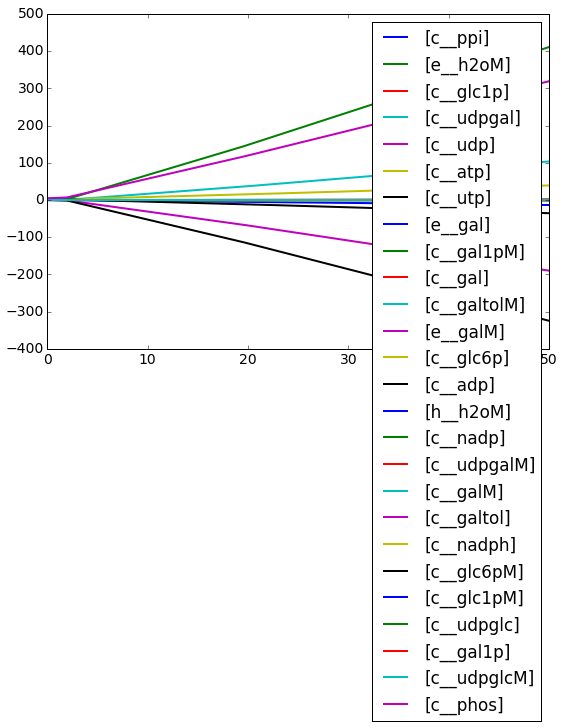

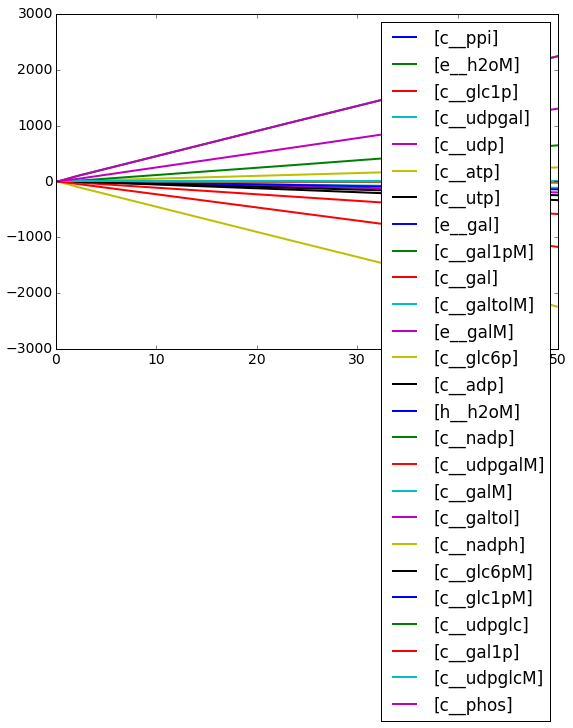

         time,     [c__ppi], [e__h2oM],  [c__glc1p], [c__udpgal],   [c__udp], [c__atp],    [c__utp],   [e__gal],  [c__gal1pM],    [c__gal], [c__galtolM],    [e__galM], [c__glc6p],   [c__adp], [h__h2oM],  [c__nadp], [c__udpgalM],    [c__galM], [c__galtol], [c__nadph],  [c__glc6pM],  [c__glc1pM], [c__udpglc], [c__gal1p], [c__udpglcM], [c__phos]
 [[         0,        0.008,         0,       0.012,        0.11,       0.09,      2.7,        0.27,         10,            0,     0.00012,            0,            0,       0.12,        1.2,         0,        0.1,            0,            0,       0.001,        0.1,            0,            0,        0.34,      0.001,            0,         5],
  [ 0.0500501,   0.00614294,         0,   0.0156244,    0.111298,  0.0910158,  2.70534,    0.266455,    9.93773,            0,    0.230109,            0,            0,   0.117481,    1.19466,         0, -0.0138807,            0,            0,   -0.112767,   0.213881,            0,            0,    0.341232,

In [29]:
# Simulation 
rr.reset()
# result = rr.simulate(start=0, end=1, steps=100)
s = rr.simulate(0,50,1000, plot=True)
s
import pandas as pd
from pandas import DataFrame
DataFrame(s, columns=rr.selections)

import numpy as np

rr.reset()
rr.e__gal = 10.0
rr.simulate(0,50,1000, plot=True)


# result = rr.simulate(0, 50, steps=100, variableStep=True, plot=True)

In [ ]:
s = rr.simulate(0, duration, variableStep=True, plot=False)
# create plot
plt.subplot(121)
plt.plot(s['time'], s['[x]'], color='blue', label='x')
plt.plot(s['time'], s['[y]'], color='black', label='y')
plt.legend()
plt.xlabel('time')
plt.ylabel('x , y');
plt.xlim([0,duration])
plt.ylim([-3,3])

plt.subplot(122)
plt.plot(s['[x]'], s['[y]'], color="black")
plt.xlabel('x')
plt.ylabel('y');
plt.xlim([-3,3])
plt.ylim([-3,3]);

In [ ]:
import roadrunner
reload(roadrunner)
rr = roadrunner.RoadRunner('van_der_pol.xml')
result = rr.simulate(start=0, end=50, variableStep=True, plot=True)
# result = rr.simulate(start=0, end=1, variableStep=True)
print result

## Model behavior

Evolution of the limit cycle in the phase plane. The limit cycle begins as circle and, with varying $\mu$, become increasingly sharp. An example of a [Relaxation oscillator](http://en.wikipedia.org/wiki/Relaxation_oscillator).

The Van der Pol oscillator shows an interesting behavior depending on the dampin parameter $\mu$.

![phase plane](http://upload.wikimedia.org/wikipedia/commons/thumb/f/fa/VanderPol-lc.svg/220px-VanderPol-lc.svg.png "Van der Pol phase plane")

In [ ]:
# add the additional values of interest to the selection
rr.selections

In [ ]:
reload(roadrunner)
rr.selections = ['time'] + ['[{}]'.format(sid) for sid in rr.model.getFloatingSpeciesIds()] \
                            + rr.model.getReactionIds()
rr.selections

In [ ]:
import multiscale.odesim.roadrunner.roadrunner_tools as rt
import numpy as np
results = []
mu_values = [0, 0.01, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
for mu in mu_values:
    print mu
    s, gp = rt.simulation(rr, t_start=0, t_stop=100, parameters={'mu': mu})
    results.append(s)

In [ ]:
plt.figure(figsize=(3,8))
for k, mu in enumerate(mu_values):
    res = results[k]
    plt.plot(res['[x]'], res['[y]'], color='black')
plt.title('Phase plane of limit cycle')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-2,2])
plt.ylim([-7,7])

In [ ]:
import numpy as np

In [ ]:
# calculating the derivatives for given concentrations
def dxdt(rr, X, Y): 
    DX = np.zeros_like(X)
    DY = np.zeros_like(Y)
    for k, _ in np.ndenumerate(X):
        # print('X[k], Y[k]', X[k], Y[k])
        rr['[x]'], rr['[y]'] = X[k], Y[k] 
        DX[k], DY[k] = rr['J1'], rr['J2']
    return DX, DY

In [ ]:
def phase_portrait(rr, x=np.linspace(-4, 4, 20), y=np.linspace(-7, 7, 20), figsize = (5,8)):
    
    fig2 = plt.figure(figsize=figsize)
    ax2 = fig2.add_subplot(1,1,1)

    # quiverplot
    # define a grid and compute direction at each point
    X1 , Y1  = np.meshgrid(x, y)                    # create a grid
    DX1, DY1 = dxdt(rr, X1, Y1)                   # compute J1 and J2 (use roadrunner as calculator)

    M = (np.hypot(DX1, DY1))                        # norm the rate 
    M[ M == 0] = 1.                                 # avoid zero division errors 
    DX1 /= M                                        # normalize each arrows
    DY1 /= M

    ax2.quiver(X1, Y1, DX1, DY1, M, pivot='mid')
    # ax2.xaxis.label = 'x'
    # ax2.yaxis.label = 'y'
    # ax2.legend()
    ax2.grid()

In [ ]:
for mu in [0.3, 0.0, 0.3, 4.0]:
    print mu
    rr['mu'] = mu
    phase_portrait(rr, figsize=(4,4))
    trajectory(mu, x0=2.3, y0=4.0)

## Phase plane and trajectories

We can now analyse the phase plane and the trajectories for different damping values $mu$.

In [ ]:
mu = 0.3  # 0.0, 0.3, 4.0

# create phase portrait
rr['mu'] = mu
phase_portrait(rr)
# single trajectories
def trajectory(mu, x0=2.0, y0=0.0, color="black"):
    s, _ = rt.simulation(rr, t_start=0, t_stop=100, parameters = {'mu' : mu}, init_concentrations={'x':x0, 'y':y0})
    plt.plot(s['[x]'], s['[y]'], color=color)


trajectory(mu, x0=2.3, y0=4.0)
trajectory(mu, x0=0.2, y0=0.4)
trajectory(mu, x0=-2.0, y0=6.0)
trajectory(mu, x0=-2.0, y0=-6.0)
# limit cycle
trajectory(mu, color="blue")